<a href="https://colab.research.google.com/github/rnignon/DAP/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19에 따른 온라인을 통한 소비 통계
2019년 12월에 처음 발생한 코로나 바이러스는 현재 우리의 생활에 큰 영향을 미쳤다.

감염 질환인 코로나 바이러스를 예방하기 위해 학생들의 수업은 온라인으로 전환되었고, 모임을 자제하도록 하였다.  

이러한 변화에 따른 사람들의 **온라인을 통한 소비**에 대한 데이터를 분석한다.


---

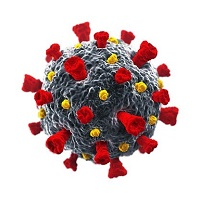

In [173]:
from dateutil.parser import parse
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime as dt

# 데이터 불러오기
covid = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/covid19.csv')
food = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/naver_datalab_shoppingInsight_category_food.csv')
clothes = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/naver_datalab_shoppingInsight_category_clothes.csv')
onlineShopping = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/onlineShopping.csv')
delivery = pd.read_csv('https://raw.githubusercontent.com/rnignon/DAP/main/delivery.csv')

covid

,date,confirmed,dead
0,2020-01-20,1,-
1,2020-01-21,0,-
2,2020-01-22,0,-
3,2020-01-23,0,-
4,2020-01-24,1,-
...,...,...,...
693,2021-12-13,"5,817",40
694,2021-12-14,"5,567",94
695,2021-12-15,"7,850",70
696,2021-12-16,"7,622",62


In [165]:
covidDf = pd.DataFrame(data = covid.confirmed.array, index = covid.date, columns = ['confirmed'])
covidDf = covidDf.replace(',', '', regex = True)
covidDf['confirmed'] = pd.to_numeric(covidDf['confirmed'])
deadDf = pd.DataFrame(data = covid.dead.array, index = covid.date, columns = ['dead'])
deadDf = deadDf.replace(',', '', regex = True)
deadDf = deadDf.replace('-', '', regex = True)
deadDf['dead'] = pd.to_numeric(deadDf['dead'])

xdates = [dt.strptime(dstr, '%Y-%m-%d') for dstr in covidDf.index]
deadX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in deadDf.index]

covidDf

,confirmed
date,
2020-01-20,1
2020-01-21,0
2020-01-22,0
2020-01-23,0
2020-01-24,1
...,...
2021-12-13,5817
2021-12-14,5567
2021-12-15,7850


# COVID-19 확진자 추이


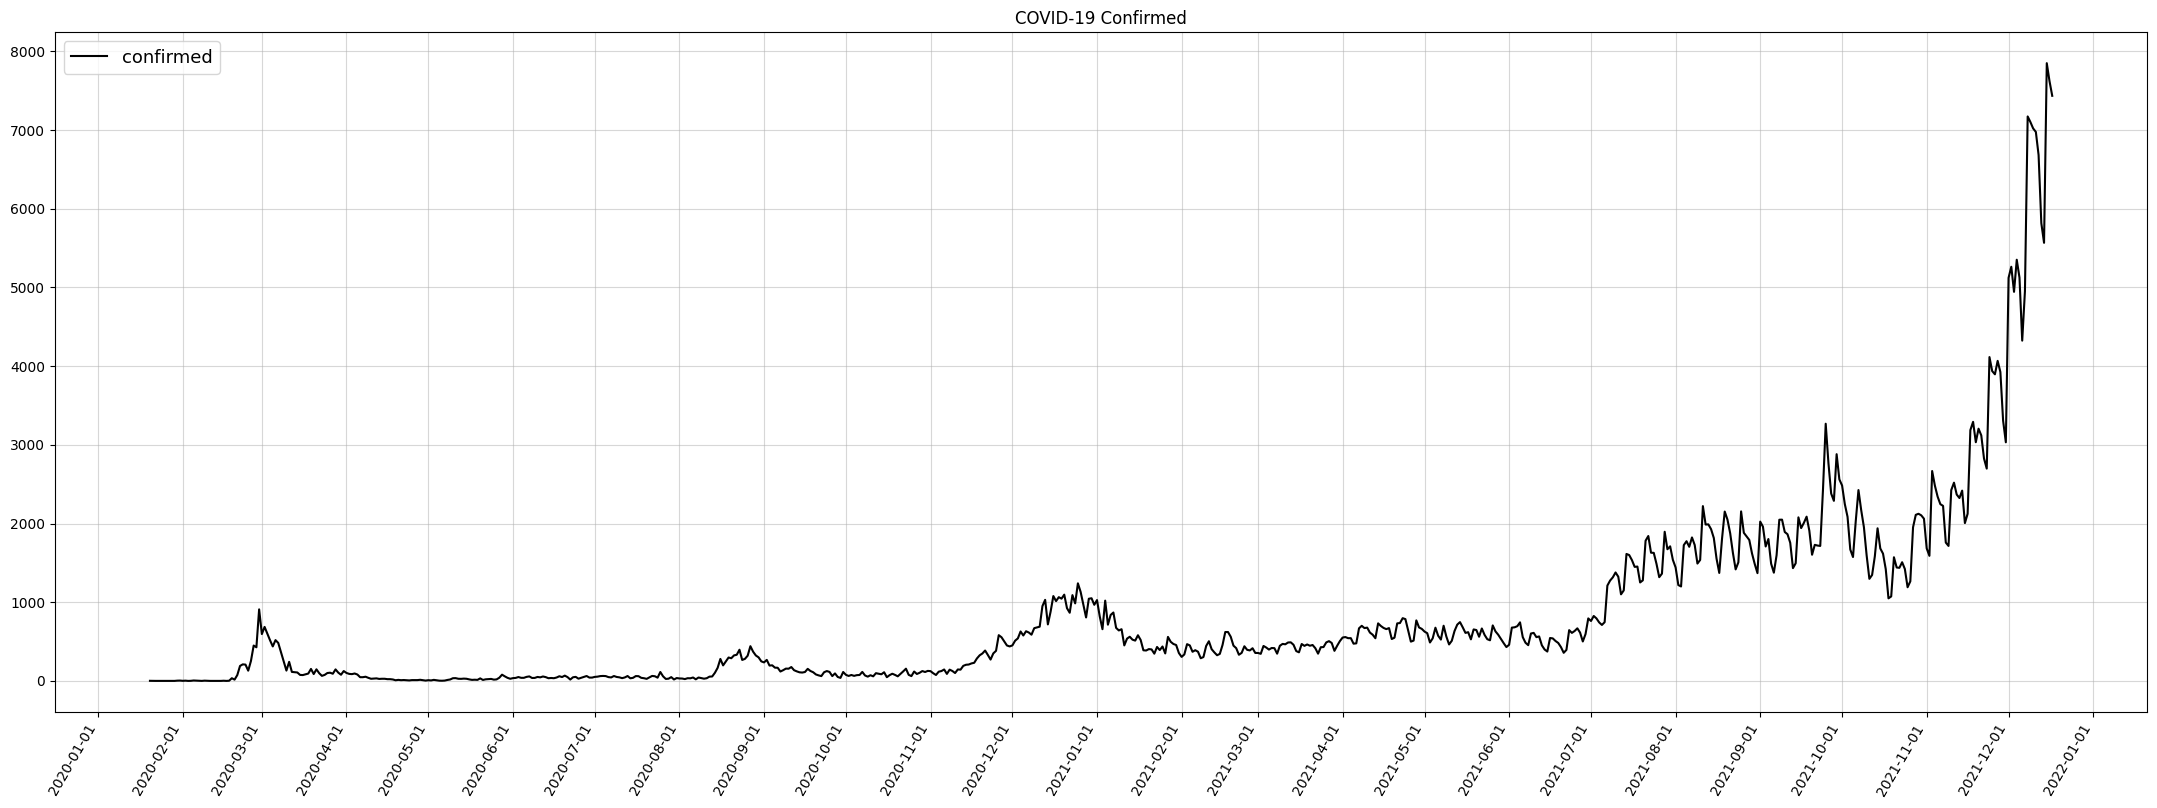

In [171]:
plt.figure(figsize = (27, 9), dpi = 100)
plt.title("COVID-19 Confirmed")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.plot(xdates, covidDf['confirmed'], "-", color = 'black', label = 'confirmed')

plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.grid(alpha=0.5)
plt.legend(fontsize = 13)
plt.show()

# COVID-19 사망자 추이
확진자 추이와 비슷한 동향으로 나타난다.

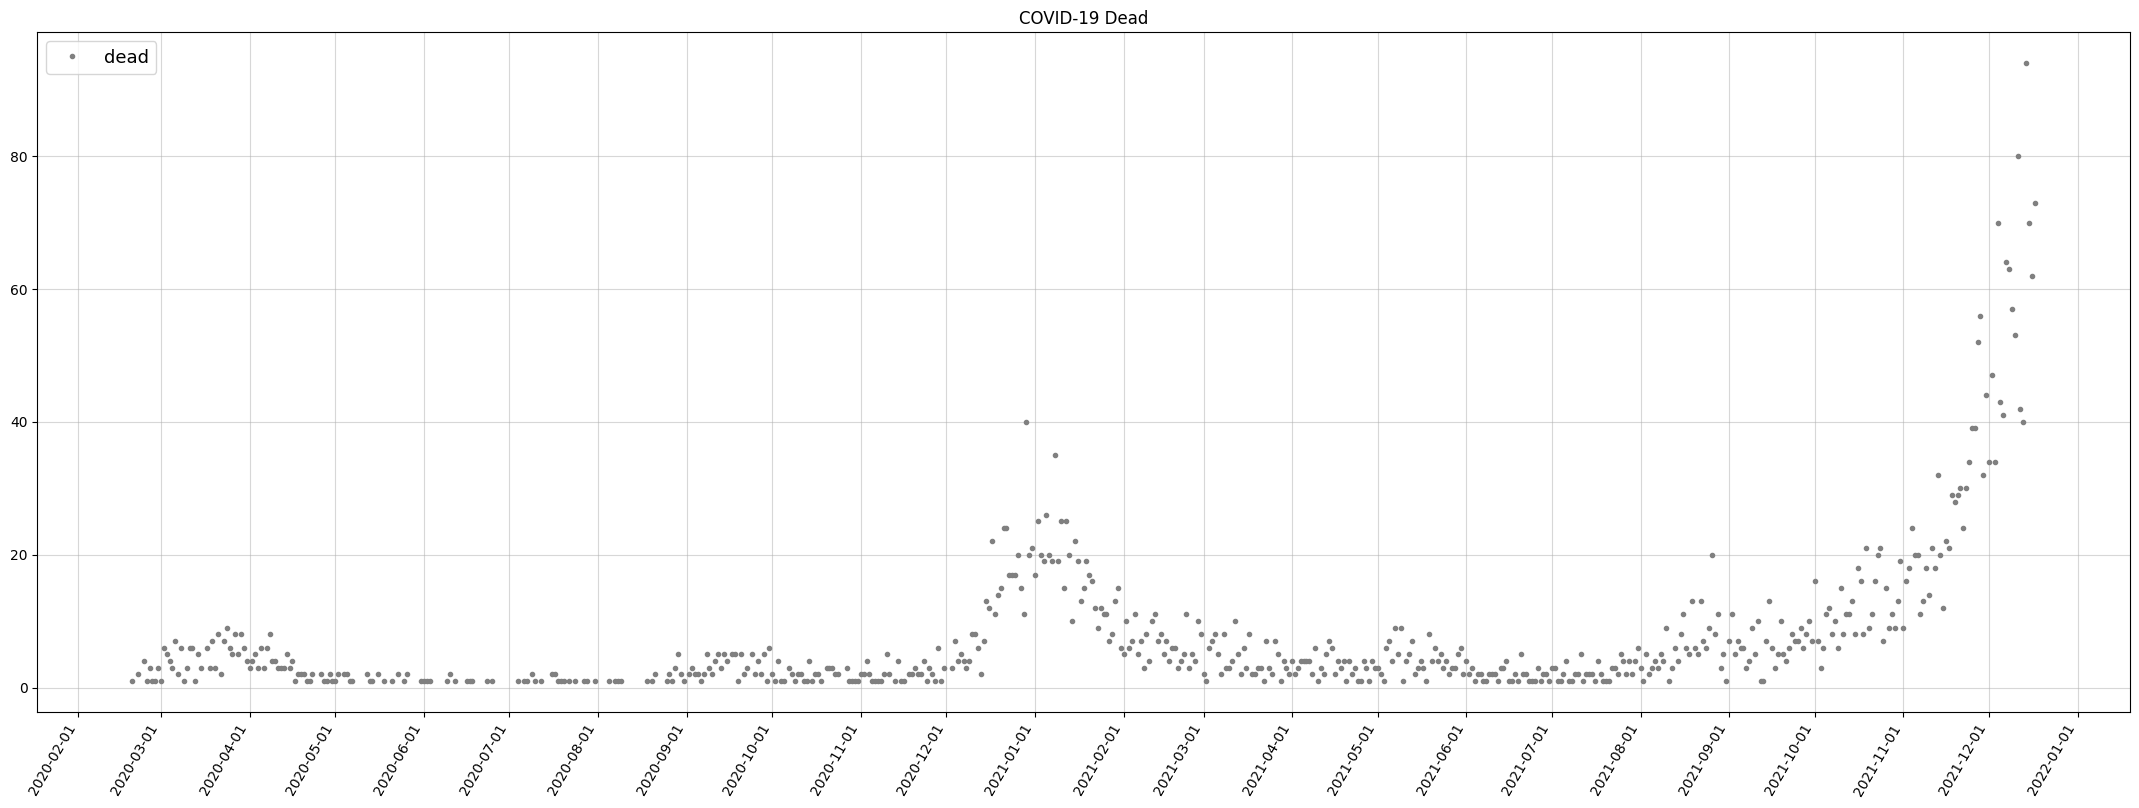

In [170]:
plt.figure(figsize = (27, 9), dpi = 100)
plt.title("COVID-19 Dead")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.plot(deadX, deadDf['dead'], ".", color = 'grey', label = 'dead')

plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.grid(alpha=0.5)
plt.legend(fontsize = 13)
plt.show()

# 사회적 거리두기 실시
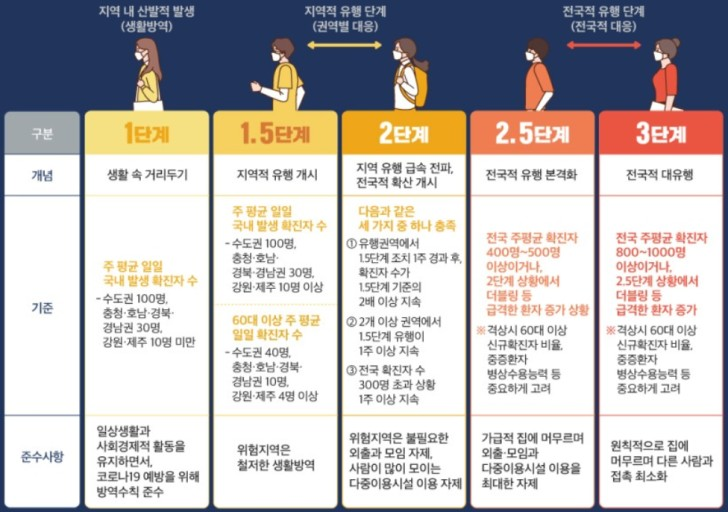



**2020년**
- 3월 22일, 15일간 강도 높은 사회적 거리두기 대책 발표
- 5월 6일, '생활 속 거리두기' 생활 방역 시작
- 8월 16일, 수도권 거리두기 2단계 격상
- 8월 23일, 전국적 거리두기 2단계 격상
- 8월 30일, 더욱 강화된 거리두기 2.5단계 실시
- 9월 14일, 거리두기 2단계로 하향
- 10월 12일, 거리두기 1단계로 하향
- 11월 24일, 거리두기 2단계 격상
- 12월 8일, 수도권 거리두기 2.5단계로 격상

**2021년**
- 1월 2일, 5인 이상 집합 금지 전국적 확대
- 2월 15일, 비수도권 1.5단계, 수도권 2단계로 하향
- 7월 12일, 거리두기 4단계로 격상 (경기, 인천의 모든 유치원, 초, 중, 고 전면 원격 수업 전환. 서울은 14일부터 적용)
- 7월 14일, 전국적 거리두기 2단계로 격상
.
.
.



In [ ]:
clothesDf = pd.DataFrame(data = clothes.PRODUCT.array, index = clothes.DATE, columns = ['PRODUCT'])
foodDf = pd.DataFrame(data = food.PRODUCT.array, index = food.DATE, columns = ['PRODUCT'])

clothesX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in clothesDf.index]
foodX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in foodDf.index]

# 네이버 쇼핑 인사이트 - 패션의류
클릭이 발생한 검색어의 클릭량 추이를 조사한다.

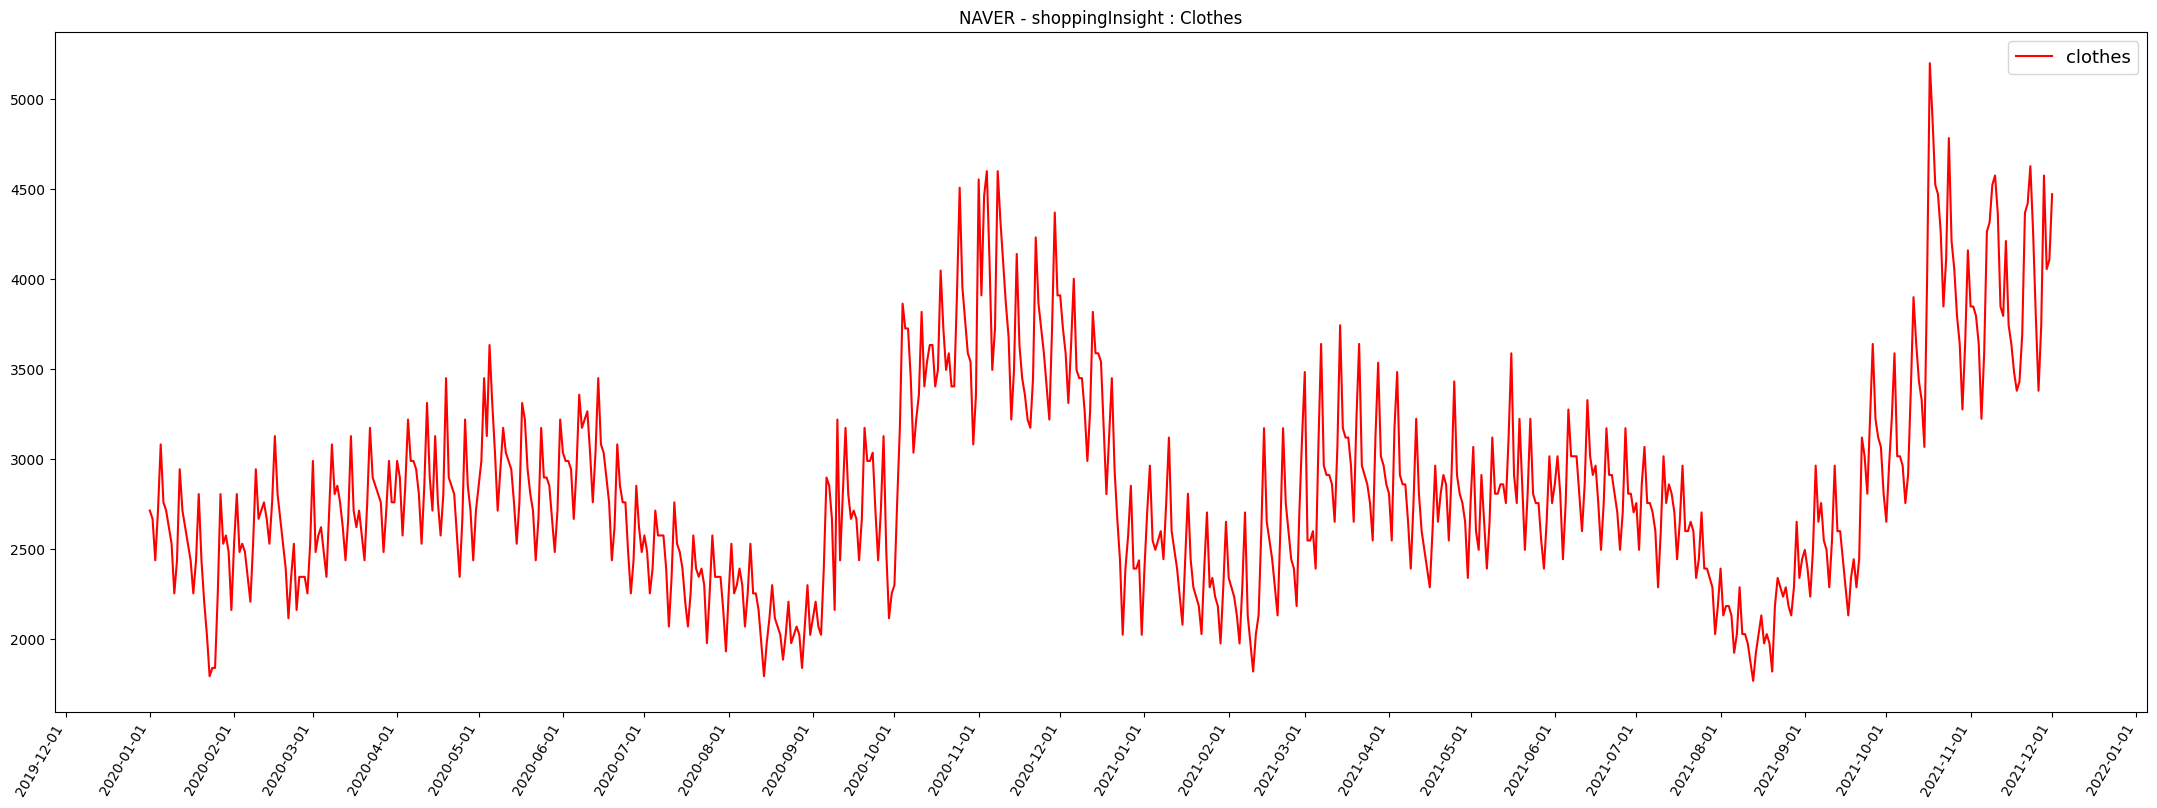

In [ ]:
plt.figure(figsize = (27, 9), dpi = 100)
plt.title("NAVER - shoppingInsight : Clothes")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.plot(clothesX, clothesDf['PRODUCT'], "-", color = 'red', label = 'clothes')
plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.legend(fontsize = 13)
plt.show()

# 네이버 쇼핑 인사이트 - 식품
클릭이 발생한 검색어의 클릭량 추이를 조사한다.

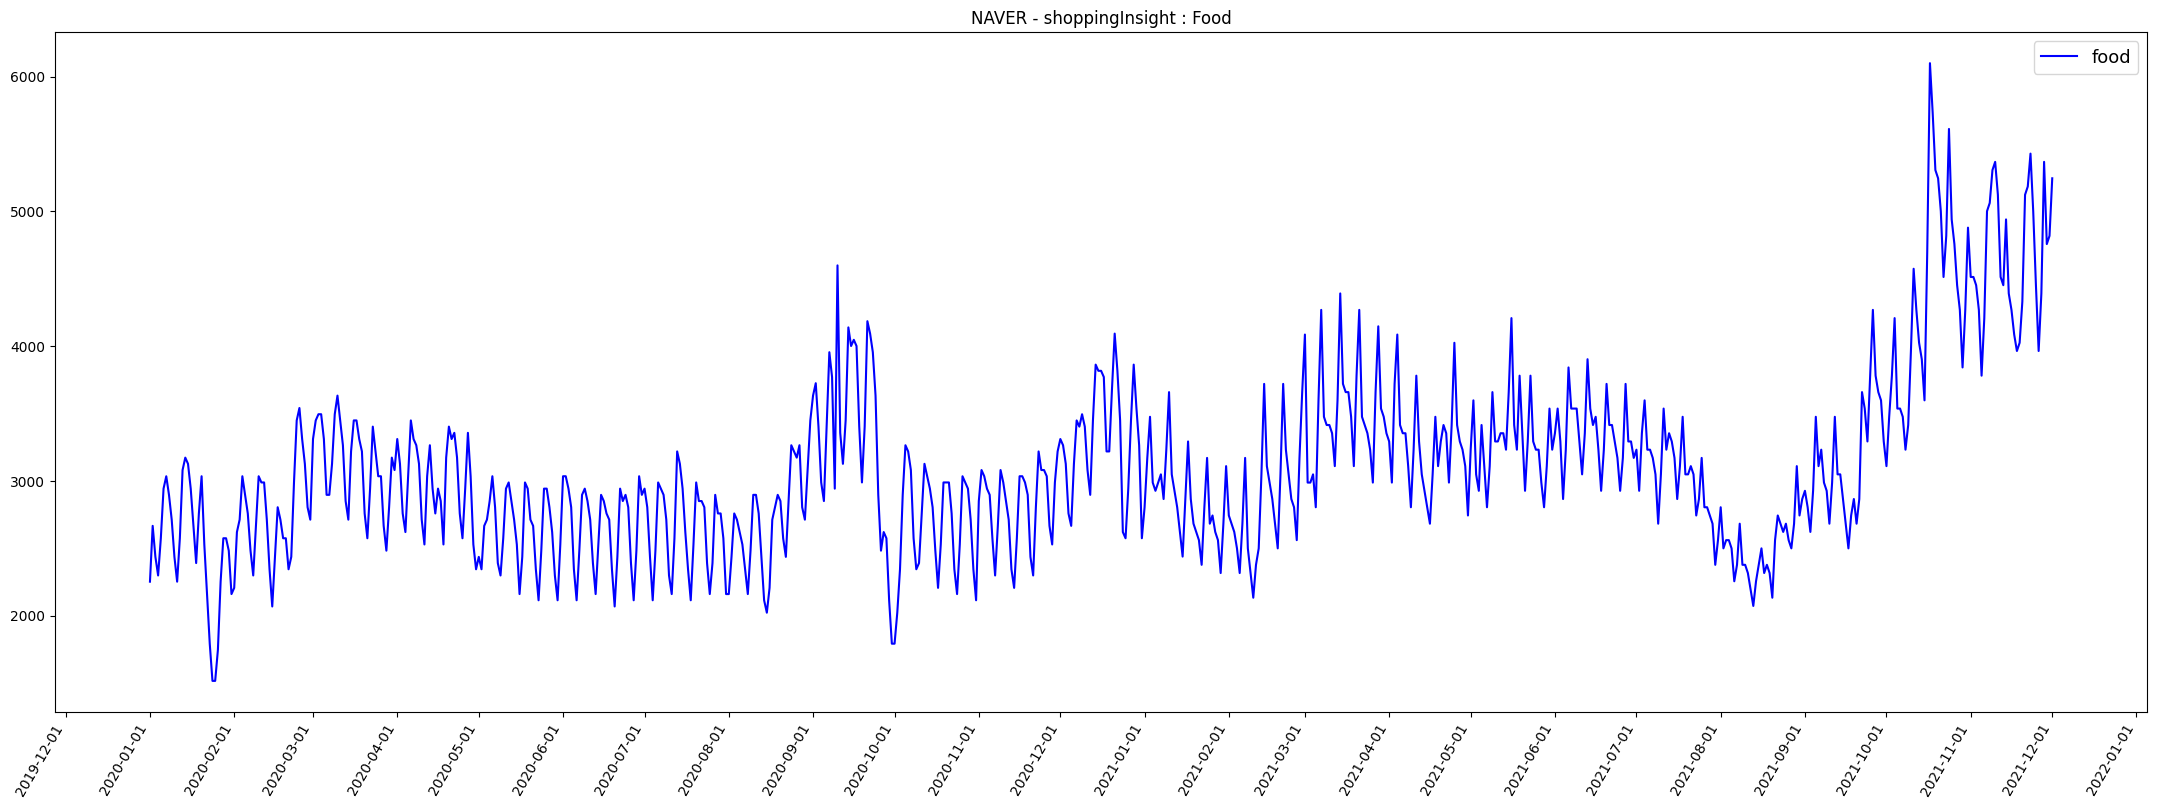

In [ ]:
plt.figure(figsize = (27, 9), dpi = 100)
plt.title("NAVER - shoppingInsight : Food")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.plot(foodX, foodDf['PRODUCT'], "-", color = 'blue', label = 'food')
plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.legend(fontsize = 13)
plt.show()

# 온라인 쇼핑 동향
온라인·모바일을 통한 쇼핑 추이를 분석한다.


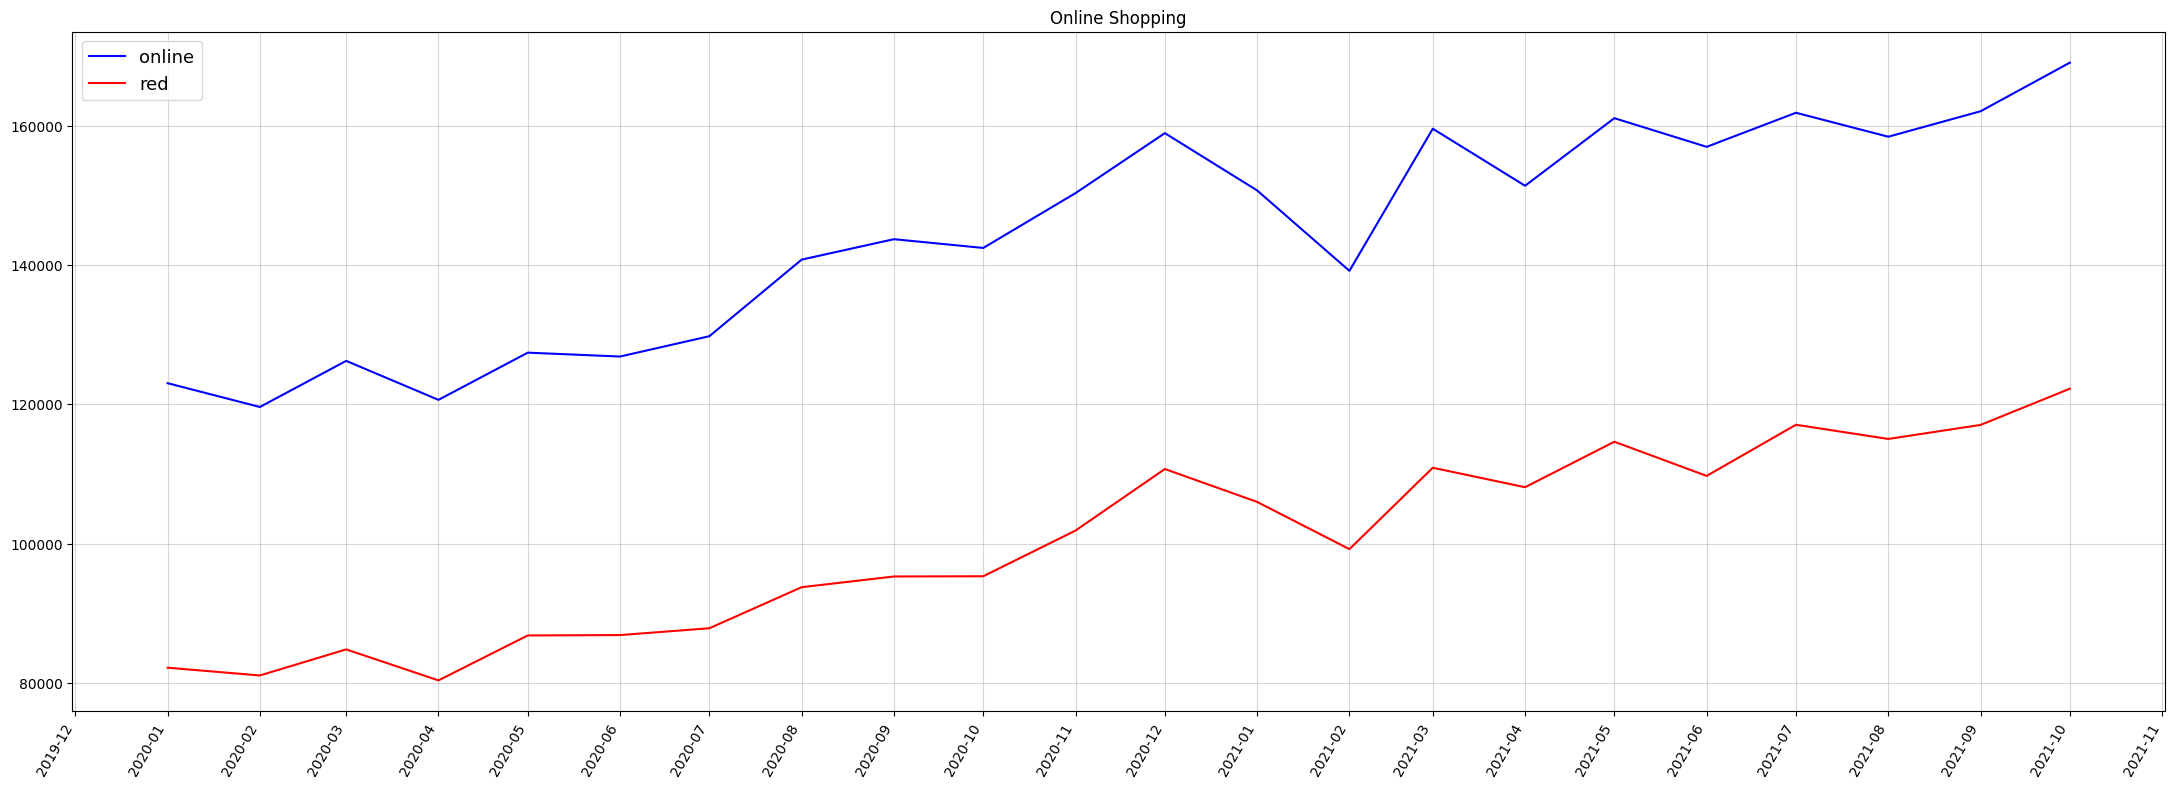

In [172]:
onlineDf = pd.DataFrame(data = onlineShopping.online.array, index = onlineShopping.date, columns = ['online'])
onlineX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in onlineDf.index]
mobileDf = pd.DataFrame(data = onlineShopping.mobile.array, index = onlineShopping.date, columns = ['mobile'])
mobileX = [dt.strptime(dstr, '%Y-%m-%d') for dstr in mobileDf.index]

plt.figure(figsize = (27, 9), dpi = 100)
plt.title("Online Shopping")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.plot(onlineX, onlineDf['online'], "-", color = 'blue', label = 'online')
plt.plot(mobileX, mobileDf['mobile'], "-", color = 'red', label = 'red')
plt.setp(plt.gca().get_xticklabels(), rotation = 60, ha = "right")
plt.grid(alpha=0.5)
plt.legend(fontsize = 13)
plt.show()

# 택배 물량의 분석
택배 이용의 빈도를 분석한다.